In [1]:
! pip install termcolor

# Imports

In [2]:
import utils.sequences
from utils.sequences import generate_random_kwargs
from utils.sequences import UpAndDown, StraightLine, HighPeak, Up, Down, UpAndDown, UpAndDownAndNormal, CrazyRandom
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored
import os

# Step 1 - generating UTS examples (source dataset)

In [3]:
print(colored("Hello! I'll walk you through this tutorial", "blue"))
print(colored("To generate the synthetic data, we will only need to decide some paramters, and we are good to go!", "blue"))

Hello! I'll walk you through this tutorial
To generate the synthetic data, we will only need to decide some paramters, and we are good to go!


#### Simple generation example

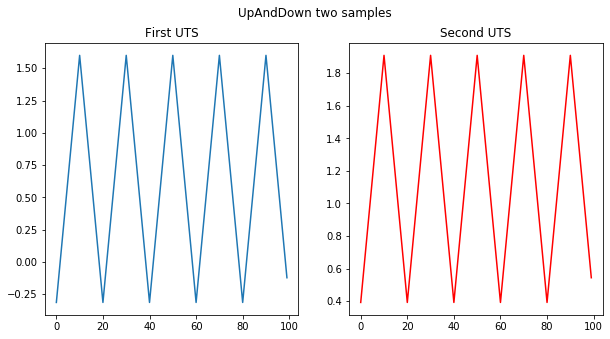

In [4]:
# What the time series sequence length will be
seq_lengths = 100

# How many samples to generate - if over 50K, it's better to do in batches
num_samples = 2

# number of cycles we want our segment pattern to repeat itself, we will look on that later
num_cycles = 5

# How much std or noise we want to add to the time series
std = 0

# a start and end range for the starting point of the time series
starting_point = [-1, 1]

# to what value we would like to normalized the final time series
y_max_value = [-2, 2]

kwargs = {
    'num_samples': num_samples,
    'seq_length': seq_lengths,
    'num_cycles': num_cycles,
    'std': std,
    'starting_point': starting_point,
    'y_max_value': y_max_value
}
UTS = UpAndDown(**kwargs).generate_data()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle('UpAndDown two samples')
ax1.plot(UTS[0])
ax1.set_title("First UTS")
ax2.plot(UTS[1], color = 'red')
ax2.set_title("Second UTS")
plt.show()

In [5]:
print(colored("What we see here, is that the time serieses are looking quiet the same, they only differ in the min and max values", "blue"))
print(colored("Let's play with the parameters a little bit and see how they change the time series", "blue"))

What we see here, is that the time serieses are looking quiet the same, they only differ in the min and max values
Let's play with the parameters a little bit and see how they change the time series


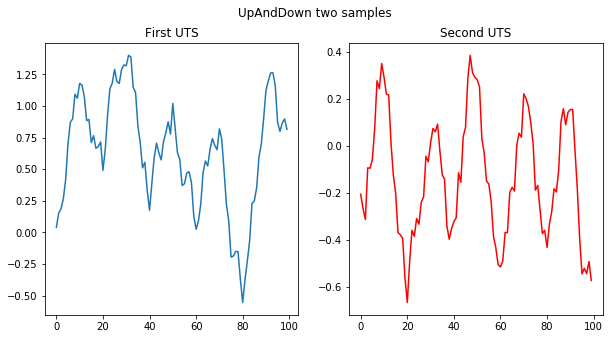

In [6]:
# What the time series sequence length will be
seq_lengths = 100

# How many samples to generate - if over 50K, it's better to do in batches
num_samples = 2

# number of cycles we want our segment pattern to repeat itself, we will look on that later
num_cycles = 5

# How much std or noise we want to add to the time series
std = 2

# a start and end range for the starting point of the time series
starting_point = [-1, 1]

# to what value we would like to normalized the final time series
y_max_value = [-2, 2]

kwargs = {
    'num_samples': num_samples,
    'seq_length': seq_lengths,
    'num_cycles': num_cycles,
    'std': std,
    'starting_point': starting_point,
    'y_max_value': y_max_value
}
UTS = UpAndDown(**kwargs).generate_data()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle('UpAndDown two samples')
ax1.plot(UTS[0])
ax1.set_title("First UTS")
ax2.plot(UTS[1], color = 'red')
ax2.set_title("Second UTS")
plt.show()

In [7]:
print(colored("Changing the std only change the time series a lot!", "blue"))

Changing the std only change the time series a lot!


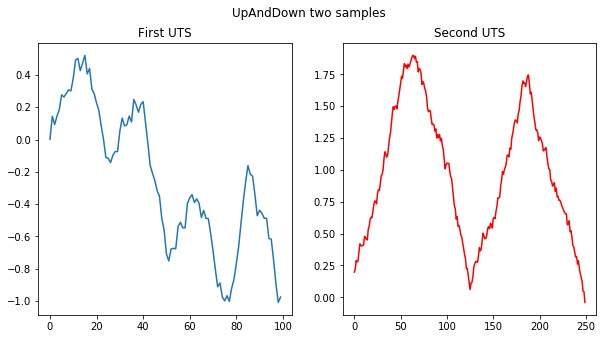

In [8]:
# What the time series sequence length will be
seq_lengths = 100

# How many samples to generate - if over 50K, it's better to do in batches
num_samples = 1

# number of cycles we want our segment pattern to repeat itself, we will look on that later
num_cycles = 4

# How much std or noise we want to add to the time series
std = 2

# a start and end range for the starting point of the time series
starting_point = [-1, 1]

# to what value we would like to normalized the final time series
y_max_value = [-2, 2]

kwargs = {
    'num_samples': num_samples,
    'seq_length': seq_lengths,
    'num_cycles': num_cycles,
    'std': std,
    'starting_point': starting_point,
    'y_max_value': y_max_value
}
UTS1 = UpAndDown(**kwargs).generate_data()[0]

# What the time series sequence length will be
seq_lengths = 250

# How many samples to generate - if over 50K, it's better to do in batches
num_samples = 1

# number of cycles we want our segment pattern to repeat itself, we will look on that later
num_cycles = 2

# How much std or noise we want to add to the time series
std = 2

# a start and end range for the starting point of the time series
starting_point = [-5, 5]

# to what value we would like to normalized the final time series
y_max_value = [-5, 5]

kwargs = {
    'num_samples': num_samples,
    'seq_length': seq_lengths,
    'num_cycles': num_cycles,
    'std': std,
    'starting_point': starting_point,
    'y_max_value': y_max_value
}
UTS2 = UpAndDown(**kwargs).generate_data()[0]
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle('UpAndDown two samples')
ax1.plot(UTS1)
ax1.set_title("First UTS")
ax2.plot(UTS2, color = 'red')
ax2.set_title("Second UTS")
plt.show()

In [9]:
print(colored("Now we can see this are completely different time series! however, they follow the same pattern of up and down", "blue"))
print(colored("Now for final plot, we will show how to make this generating process automated", "blue"))

Now we can see this are completely different time series! however, they follow the same pattern of up and down
Now for final plot, we will show how to make this generating process automated


#### Automated and diverse generation example

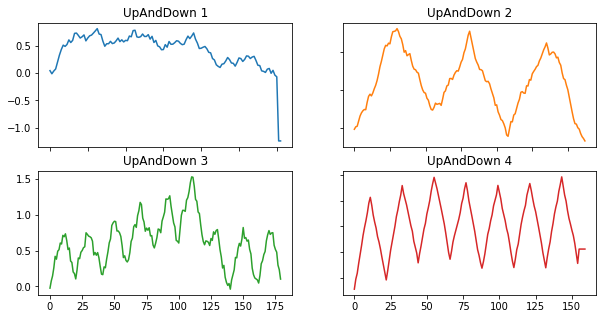

In [10]:
# What the time series sequence length will be
seq_lengths = [100, 200]

# How many samples to generate - if over 50K, it's better to do in batches
num_samples = 4

# number of cycles we want our segment pattern to repeat itself, we will look on that later
num_cycles = [2, 10]

# How much std or noise we want to add to the time series
std = [0,3]

# a start and end range for the starting point of the time series
starting_point = [-1, 1]

# to what value we would like to normalized the final time series
y_max_value = [-2, 2]


dataset = []
for i in range(num_samples):
    kwargs = generate_random_kwargs(seq_lengths, num_cycles, std, starting_point, y_max_value)
    UTS = UpAndDown(**kwargs).generate_data()[0]
    dataset.append(UTS)

fig, axs = plt.subplots(2, 2, figsize=(10,5))
axs[0, 0].plot(dataset[0])
axs[0, 0].set_title('UpAndDown 1')
axs[0, 1].plot(dataset[1], 'tab:orange')
axs[0, 1].set_title('UpAndDown 2')
axs[1, 0].plot(dataset[2], 'tab:green')
axs[1, 0].set_title('UpAndDown 3')
axs[1, 1].plot(dataset[3], 'tab:red')
axs[1, 1].set_title('UpAndDown 4')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [11]:
print(colored("Let's do the same for other sequence pattern", "blue"))
print(colored("Let's take HighPeak", "blue"))

Let's do the same for other sequence pattern
Let's take HighPeak


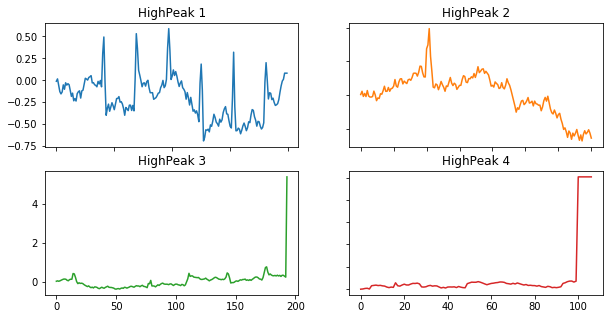

In [12]:
from utils.sequences import HighPeak


# What the time series sequence length will be
seq_lengths = [100, 200]

# How many samples to generate - if over 50K, it's better to do in batches
num_samples = 4

# number of cycles we want our segment pattern to repeat itself, we will look on that later
num_cycles = [2, 10]

# How much std or noise we want to add to the time series
std = [0,3]

# a start and end range for the starting point of the time series
starting_point = [-1, 1]

# to what value we would like to normalized the final time series
y_max_value = [-2, 2]


dataset = []
for i in range(num_samples):
    kwargs = generate_random_kwargs(seq_lengths, num_cycles, std, starting_point, y_max_value)
    UTS = HighPeak(**kwargs).generate_data()[0]
    dataset.append(UTS)

fig, axs = plt.subplots(2, 2, figsize=(10,5))
axs[0, 0].plot(dataset[0])
axs[0, 0].set_title('HighPeak 1')
axs[0, 1].plot(dataset[1], 'tab:orange')
axs[0, 1].set_title('HighPeak 2')
axs[1, 0].plot(dataset[2], 'tab:green')
axs[1, 0].set_title('HighPeak 3')
axs[1, 1].plot(dataset[3], 'tab:red')
axs[1, 1].set_title('HighPeak 4')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#### Create my own Pattern!!

In [13]:
print(colored("Fianlly! explaination about how to create your own pattern", "blue"))
print(colored("Let's add a pattern that goes up and than goes staright", "blue"))
print(colored("We will add a new class to sequence same way as the others are defined, and just change there pattern", "blue"))
print(colored("I've added the lowest class: UpStraight", "blue"))
print(colored("his pattern is: ['U', 0.5, 45], ['S', 0.5, 0] ", "blue"))
print(colored("goint up half of the time in a 45 degrees amgle and then going staright for half of the time", "blue"))
print(colored("Let's look at the results", "blue"))

Fianlly! explaination about how to create your own pattern
Let's add a pattern that goes up and than goes staright
We will add a new class to sequence same way as the others are defined, and just change there pattern
I've added the lowest class: UpStraight
his pattern is: ['U', 0.5, 45], ['S', 0.5, 0] 
goint up half of the time in a 45 degrees amgle and then going staright for half of the time
Let's look at the results


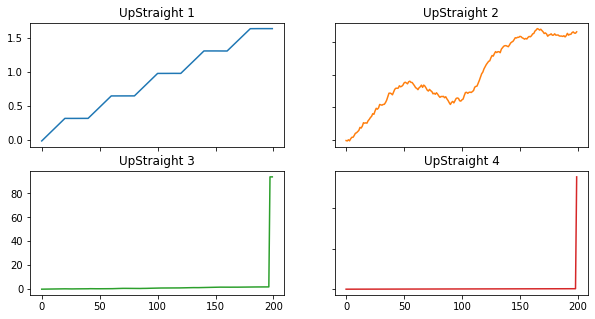

In [14]:
from utils.sequences import UpStraight


# What the time series sequence length will be
seq_lengths = [200, 200]

# How many samples to generate - if over 50K, it's better to do in batches
num_samples = 4

# number of cycles we want our segment pattern to repeat itself, we will look on that later
num_cycles = [2, 10]

# How much std or noise we want to add to the time series
std = [0,3]

# a start and end range for the starting point of the time series
starting_point = [-1, 1]

# to what value we would like to normalized the final time series
y_max_value = [-2, 2]


dataset = []
for i in range(num_samples):
    kwargs = generate_random_kwargs(seq_lengths, num_cycles, std, starting_point, y_max_value)
    UTS = UpStraight(**kwargs).generate_data()[0]
    dataset.append(UTS)

fig, axs = plt.subplots(2, 2, figsize=(10,5))
axs[0, 0].plot(dataset[0])
axs[0, 0].set_title('UpStraight 1')
axs[0, 1].plot(dataset[1], 'tab:orange')
axs[0, 1].set_title('UpStraight 2')
axs[1, 0].plot(dataset[2], 'tab:green')
axs[1, 0].set_title('UpStraight 3')
axs[1, 1].plot(dataset[3], 'tab:red')
axs[1, 1].set_title('UpStraight 4')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [15]:
print(colored("Simple as that, we created a new pattern!", "blue"))

Simple as that, we created a new pattern!


# Step 2 - producing Regression tasks (source task)

In [16]:
print(colored("Now, given a time series, we want to add his Regression task!", "blue"))
print(colored("Very simple, just choose the features, we chose the first 5 features", "blue"))

Now, given a time series, we want to add his Regression task!
Very simple, just choose the features, we chose the first 5 features


In [17]:
from utils.feature_set import Maximum, Minimum, STD, CrossMean, Peaks, Split10th
import utils.feature_set as fs

feature_set = [Maximum(), Minimum(), STD(), CrossMean(), Peaks()]
tasks = fs.create_regression_tastks_no_multi(np.array(dataset), feature_set)
tasks = tasks.reshape(tasks.shape[0], 5)
tasks.shape

(4, 5)

In [18]:
print(colored("That's great, we have 4 samples and 5 regression for each task", "blue"))
print(colored("Let's show how to add a feature, it's very simple, in the feature_set class", "blue"))
print(colored("Just add a new class the same way the others are defined. Lets add a feature that sum up the time series", "blue"))
print(colored("I just added a new one called 'summing_up' and override his compute_feature function with np.sum()", "blue"))

That's great, we have 4 samples and 5 regression for each task
Let's show how to add a feature, it's very simple, in the feature_set class
Just add a new class the same way the others are defined. Lets add a feature that sum up the time series
I just added a new one called 'summing_up' and override his compute_feature function with np.sum()


In [19]:
from utils.feature_set import summing_up
import utils.feature_set as fs

feature_set = [summing_up()]
tasks = fs.create_regression_tastks_no_multi(np.array(dataset), feature_set)
tasks = tasks.reshape(tasks.shape[0], 1)
tasks.shape

(4, 1)

In [20]:
print(colored("Great! so let's create our final source task", "blue"))

Great! so let's create our final source task


In [21]:
feature_set = [Maximum(), Minimum(), STD(), CrossMean(), Peaks()]
tasks = fs.create_regression_tastks_no_multi(np.array(dataset), feature_set)
tasks = tasks.reshape(tasks.shape[0], 5)

# Step 3 - choosing CNN architecture

In [27]:
print(colored("I chose CTN, just a simple CNN architcture but one can choose what ever he wants", "blue"))

I chose CTN, just a simple CNN architcture but one can choose what ever he wants


In [26]:
from keras.layers import GlobalMaxPool1D, Activation, add, Concatenate,  Input,Dense, BatchNormalization, Dropout, Conv1D, MaxPool1D, GlobalAveragePooling1D, concatenate
from keras import Model

dataset = np.array(dataset)
source_dataset = dataset.reshape(dataset.shape[0], dataset.shape[1], 1)
source_task = tasks


def CTN(x_shape, num_tasks):
    # Input layer
    input_layer = Input((None, x_shape[2]))
    
    # First layer
    convolution1 = Conv1D(filters=33, kernel_size=4, padding='same')(input_layer)
    convolution2 = Conv1D(filters=33, kernel_size=8, padding='same')(input_layer)
    convolution3 = Conv1D(filters=33, kernel_size=16, padding='same')(input_layer)
    convolution4 = Conv1D(filters=33, kernel_size=32, padding='same')(input_layer)
    convolution5 = Conv1D(filters=33, kernel_size=64, padding='same')(input_layer)
    concatted = Concatenate()([convolution1, convolution2, convolution3, convolution4, convolution5])
    batchnorm = BatchNormalization()(concatted)
    x = Activation(activation="relu")(batchnorm)
    
    convolution11 = Conv1D(filters=33, kernel_size=4, padding='same')(x)
    convolution21 = Conv1D(filters=33, kernel_size=8, padding='same')(x)
    convolution31 = Conv1D(filters=33, kernel_size=16, padding='same')(x)
    convolution41 = Conv1D(filters=33, kernel_size=32, padding='same')(x)
    convolution51 = Conv1D(filters=33, kernel_size=64, padding='same')(x)
    concatted2 = Concatenate()([convolution11, convolution21, convolution31, convolution41, convolution51])
    batchnorm2 = BatchNormalization()(concatted2)
    
    conv1 = Conv1D(filters=1,kernel_size=1)(input_layer)
    x = add([batchnorm2, conv1])
    x = Activation('relu')(x)
    
    # Second layer
    input_layer2 = x
    convolution1 = Conv1D(filters=33, kernel_size=4, padding='same')(input_layer2)
    convolution2 = Conv1D(filters=33, kernel_size=8, padding='same')(input_layer2)
    convolution3 = Conv1D(filters=33, kernel_size=16, padding='same')(input_layer2)
    convolution4 = Conv1D(filters=33, kernel_size=32, padding='same')(input_layer2)
    convolution5 = Conv1D(filters=33, kernel_size=64, padding='same')(input_layer2)
    concatted = Concatenate()([convolution1, convolution2, convolution3, convolution4, convolution5])
    batchnorm = BatchNormalization()(concatted)
    x = Activation(activation="relu")(batchnorm)
    
    convolution11 = Conv1D(filters=33, kernel_size=4, padding='same')(x)
    convolution21 = Conv1D(filters=33, kernel_size=8, padding='same')(x)
    convolution31 = Conv1D(filters=33, kernel_size=16, padding='same')(x)
    convolution41 = Conv1D(filters=33, kernel_size=32, padding='same')(x)
    convolution51 = Conv1D(filters=33, kernel_size=64, padding='same')(x)
    concatted2 = Concatenate()([convolution11, convolution21, convolution31, convolution41, convolution51])
    batchnorm2 = BatchNormalization()(concatted2)
    
    conv1 = Conv1D(filters=1,kernel_size=1)(input_layer2)
    x = add([batchnorm2, conv1])
    x = Activation('relu')(x)

    gap_layer = GlobalAveragePooling1D()(x)
    output = Dense(num_tasks, activation="linear")(gap_layer)
    model = Model(input_layer, output)
    model.compile(loss='MSE',
                  optimizer="adam",
                  metrics=['mse'])
    return model

model = CTN(source_dataset.shape, source_task.shape[1])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, None, 33)     165         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, None, 33)     297         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_24 (Conv1D)              (None, None, 33)     561         input_2[0][0]                    
_______________________________________________________________________________________

# Step 4 - pretraining

In [35]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
X_train, X_test, y_train, y_test = train_test_split(source_dataset, source_task, test_size=0.2, random_state=41, shuffle=True)
history = model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=16, callbacks=[es], validation_data = (X_test, y_test))

# Step 5 - Fine-tune on new target dataset

In [43]:
path = './reduced_dataset/Adiac'
import pickle
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

def load_data_reduce(dataset):
    with open(f'./reduced_dataset/{dataset}/x_train.pkl','rb') as f:
        x_train = pickle.load(f)
    with open(f'./reduced_dataset/{dataset}/x_test.pkl','rb') as f:
        x_test = pickle.load(f)
    with open(f'./reduced_dataset/{dataset}/y_train.pkl','rb') as f:
        y_train = pickle.load(f)
    with open(f'./reduced_dataset/{dataset}/y_test.pkl','rb') as f:
        y_test = pickle.load(f)
        
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
    
    uniqe = len(set(y_train))
    encoder = LabelEncoder()
    encoder.fit(y_train)
    encoded_Y = encoder.transform(y_train)
    y_train = to_categorical(encoded_Y, uniqe)
    
    uniqe = len(set(y_test))
    encoder = LabelEncoder()
    encoder.fit(y_test)
    encoded_Y = encoder.transform(y_test)
    y_test = to_categorical(encoded_Y, uniqe)
    
    return x_train, x_test, y_train, y_test


def adjust_model_to_target_dataset_and_task(loaded_model, num_class):
    pred = Dense(num_class, activation="softmax")(loaded_model.layers[-2].output)
    model = Model(inputs=loaded_model.input, outputs=pred)
    for layer in model.layers:
        layer.trainable = True
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    return model

x_train, x_test, y_train, y_test = load_data_reduce('Adiac')

model = adjust_model_to_target_dataset_and_task(model, y_train.shape[1])
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, None, 33)     165         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, None, 33)     297         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_24 (Conv1D)              (None, None, 33)     561         input_2[0][0]                    
_______________________________________________________________________________________

In [45]:
print(colored("As you can see, the chamge I made was the last layer converted to a softmax layer with new number of tasks based on the target tasks", "blue"))
print(colored("Now, just training", "blue"))

As you can see, the chamge I made was the last layer converted to a softmax layer with new number of tasks based on the target tasks
Now, just training


In [46]:
epochs = 5
history = model.fit(x_train, y_train, epochs=epochs, verbose=0, batch_size=16, validation_data = (x_test, y_test))

# Done!